# Aggregation 📚

### After this encounter we will have covered 
- how to apply different aggregation methods to your datasets
- explanation of what .groupby() does and some options on how apply it to your datasets

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## 1. Applying aggregation methods: 

In [2]:
df = pd.read_csv("large_countries_2015.csv", sep = ",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     12 non-null     object 
 1   population  12 non-null     float64
 2   fertility   12 non-null     float64
 3   continent   12 non-null     object 
dtypes: float64(2), object(2)
memory usage: 512.0+ bytes


In [3]:
df.head(2)

,country,population,fertility,continent
0,Bangladesh,160995642.0,2.12,Asia
1,Brazil,207847528.0,1.78,South America


In [4]:
df["population"] = (df["population"]/1000).astype(int) # overwriting population so values are "in thousands"

In [5]:
df.head(2)

,country,population,fertility,continent
0,Bangladesh,160995,2.12,Asia
1,Brazil,207847,1.78,South America


Let's apply some aggregation methods!
Intuition of "aggregation": take some rows, apply some kind of "operation" on them and return a resumed version of these rows.

In [6]:
df.sum()

country       BangladeshBrazilChinaIndiaIndonesiaJapanMexico...
population                                              4504146
fertility                                                 29.25
continent     AsiaSouth AmericaAsiaAsiaAsiaAsiaNorth America...
dtype: object

If we apply .sum() to the complete dataframe, strings will be concatenated. 

In [7]:
df["population"].sum()

4504146

In [8]:
df[["population", "fertility"]].sum()

population    4504146.00
fertility          29.25
dtype: float64

In [9]:
df["country"].count()

12

In [10]:
df["country"].value_counts()

Mexico           1
Brazil           1
India            1
United States    1
Philippines      1
Nigeria          1
Bangladesh       1
Japan            1
Pakistan         1
China            1
Russia           1
Indonesia        1
Name: country, dtype: int64

In [11]:
df["fertility"].nunique() # returns the number of times that each unique value shows up

12

In [12]:
df["fertility"].unique() # returns each unique value in dataset

array([2.12, 1.78, 1.57, 2.43, 2.28, 1.45, 2.13, 5.89, 3.04, 2.98, 1.61,
       1.97])

In [13]:
df.describe()

,population,fertility
count,1.200000e+01,12.000000
mean,3.753455e+05,2.437500
std,4.565193e+05,1.200781
min,1.006990e+05,1.450000
25%,1.393462e+05,1.737500
50%,1.855625e+05,2.125000
75%,2.736155e+05,2.567500
max,1.376048e+06,5.890000


.agg() can be used to aggregate more "modularly":

In [14]:
df.agg(
    {"population":"mean",
    "fertility":"median"
    }
)

population    375345.500
fertility          2.125
dtype: float64

In [15]:
df.agg(
    ["median","mean","std"]
)

,population,fertility
median,185562.500000,2.125000
mean,375345.500000,2.437500
std,456519.344768,1.200781


In [16]:
def double(x):
    return 2*x  # strange function, admittedly...

In [17]:
d = df.agg(
    {
        "population":"mean",
        "fertility":"double"
    }
)

In [18]:
d

population                                             375345.5
fertility     [2.12, 1.78, 1.57, 2.43, 2.28, 1.45, 2.13, 5.8...
dtype: object

In [19]:
df[["population", "fertility"]]

,population,fertility
0,160995,2.12
1,207847,1.78
2,1376048,1.57
3,1311050,2.43
4,257563,2.28
5,126573,1.45
6,127017,2.13
7,182201,5.89
8,188924,3.04
9,100699,2.98


In [20]:
df[["population", "fertility"]].agg(
    ["median","mean","double"]
)

,population,fertility
median,185562.5,2.125
mean,375345.5,2.4375
double,"[160995.0, 207847.0, 1376048.0, 1311050.0, 257...","[2.12, 1.78, 1.57, 2.43, 2.28, 1.45, 2.13, 5.8..."


## 2. .groupby()

What DOES .groupby() actually do?
1. it **splits** the data
2. it **applies** some kind of operation ON THE GROUPED data
3. it **combines** the data back into a new (pandas) object (i.e. series or dataframe)

Conceptually, this is what .groupby() does (similarly later: .resample())

In [21]:
g = df.groupby("continent") # not done in practice, but it is important to understand that it's an object type of its own
g

In [22]:
for index, elements in g: # "inspecting under the hood": sub dataframes are being created for you, based on the index you define 
    print(index)
    print(elements)
    print("\n")

Africa
   country  population  fertility continent
7  Nigeria      182201       5.89    Africa


Asia
       country  population  fertility continent
0   Bangladesh      160995       2.12      Asia
2        China     1376048       1.57      Asia
3        India     1311050       2.43      Asia
4    Indonesia      257563       2.28      Asia
5        Japan      126573       1.45      Asia
8     Pakistan      188924       3.04      Asia
9  Philippines      100699       2.98      Asia


Europe
   country  population  fertility continent
10  Russia      143456       1.61    Europe


North America
          country  population  fertility      continent
6          Mexico      127017       2.13  North America
11  United States      321773       1.97  North America


South America
  country  population  fertility      continent
1  Brazil      207847       1.78  South America




In [23]:
g.get_group("Asia") # just in case you really want to access a "sub DataFrame" 

,country,population,fertility,continent
0,Bangladesh,160995,2.12,Asia
2,China,1376048,1.57,Asia
3,India,1311050,2.43,Asia
4,Indonesia,257563,2.28,Asia
5,Japan,126573,1.45,Asia
8,Pakistan,188924,3.04,Asia
9,Philippines,100699,2.98,Asia


In [24]:
g1 = df.groupby(["continent", "country"])
g1

In [25]:
g1.get_group(("Asia","Bangladesh"))

,country,population,fertility,continent
0,Bangladesh,160995,2.12,Asia


In [26]:
for index, elements in g1:
    print(index)
    print(elements)
    print("\n")

('Africa', 'Nigeria')
   country  population  fertility continent
7  Nigeria      182201       5.89    Africa


('Asia', 'Bangladesh')
      country  population  fertility continent
0  Bangladesh      160995       2.12      Asia


('Asia', 'China')
  country  population  fertility continent
2   China     1376048       1.57      Asia


('Asia', 'India')
  country  population  fertility continent
3   India     1311050       2.43      Asia


('Asia', 'Indonesia')
     country  population  fertility continent
4  Indonesia      257563       2.28      Asia


('Asia', 'Japan')
  country  population  fertility continent
5   Japan      126573       1.45      Asia


('Asia', 'Pakistan')
    country  population  fertility continent
8  Pakistan      188924       3.04      Asia


('Asia', 'Philippines')
       country  population  fertility continent
9  Philippines      100699       2.98      Asia


('Europe', 'Russia')
   country  population  fertility continent
10  Russia      143456       1.61  

After grouping, we can now "mix" between aggregations and transformations, combining
- indeces we want to specify (i.e. param you are passing in .groupby())
- columns we want to apply some kind of aggregation function to
- using different aggregation methods (including usage of customized functions).

In [27]:
g2 = df.groupby("continent")["population", "fertility"].mean()
g2

,population,fertility
continent,,
Africa,182201.000000,5.890000
Asia,503121.714286,2.267143
Europe,143456.000000,1.610000
North America,224395.000000,2.050000
South America,207847.000000,1.780000


In [28]:
g3 = df.groupby(["continent", "country"])["population", "fertility"].mean()
g3

population  fertility
continent     country                             
Africa        Nigeria            182201       5.89
Asia          Bangladesh         160995       2.12
              China             1376048       1.57
              India             1311050       2.43
              Indonesia          257563       2.28
              Japan              126573       1.45
              Pakistan           188924       3.04
              Philippines        100699       2.98
Europe        Russia             143456       1.61
North America Mexico             127017       2.13
              United States      321773       1.97
South America Brazil             207847       1.78

In [29]:
g.agg(
    {
        "population":"mean",
        "fertility":double
    }
)    

,population,fertility
continent,,
Africa,182201.000000,11.78
Asia,503121.714286,"[4.24, 3.14, 4.86, 4.56, 2.9, 6.08, 5.96]"
Europe,143456.000000,3.22
North America,224395.000000,"[4.26, 3.94]"
South America,207847.000000,3.56


In [30]:
g4 = df.groupby(["continent", "country"])["population"].agg(["min", "median", double])
g4

min   median   double
continent     country                                 
Africa        Nigeria         182201   182201   364402
Asia          Bangladesh      160995   160995   321990
              China          1376048  1376048  2752096
              India          1311050  1311050  2622100
              Indonesia       257563   257563   515126
              Japan           126573   126573   253146
              Pakistan        188924   188924   377848
              Philippines     100699   100699   201398
Europe        Russia          143456   143456   286912
North America Mexico          127017   127017   254034
              United States   321773   321773   643546
South America Brazil          207847   207847   415694

In [32]:
g5 = df.groupby(["continent", "country"])

In [33]:
g5.transform(double)

,population,fertility
0,321990,4.24
1,415694,3.56
2,2752096,3.14
3,2622100,4.86
4,515126,4.56
5,253146,2.90
6,254034,4.26
7,364402,11.78
8,377848,6.08
9,201398,5.96


In [34]:
g5.apply(double)

,country,population,fertility,continent
0,BangladeshBangladesh,321990,4.24,AsiaAsia
1,BrazilBrazil,415694,3.56,South AmericaSouth America
2,ChinaChina,2752096,3.14,AsiaAsia
3,IndiaIndia,2622100,4.86,AsiaAsia
4,IndonesiaIndonesia,515126,4.56,AsiaAsia
5,JapanJapan,253146,2.90,AsiaAsia
6,MexicoMexico,254034,4.26,North AmericaNorth America
7,NigeriaNigeria,364402,11.78,AfricaAfrica
8,PakistanPakistan,377848,6.08,AsiaAsia
9,PhilippinesPhilippines,201398,5.96,AsiaAsia


Examples of how you can plot using "one-liners" in pandas (e.g. for quick EDAs):

<AxesSubplot:ylabel='continent'>

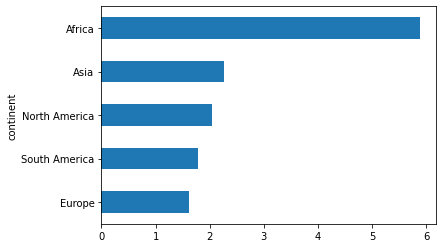

In [35]:
g["fertility"].mean().sort_values().plot.barh()

In [36]:
g6 = df.groupby(["continent","country"])

<AxesSubplot:ylabel='continent'>

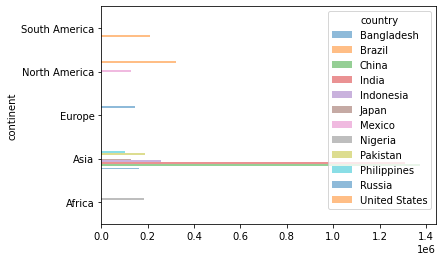

In [37]:
g6["population"].mean().unstack().plot.barh(alpha=0.5) # thanks, Alex :) Note: unstacking your groupedby- object is an usual pattern

## Comments and questions during the encounter

I will work on this later, and send a final version of the NB once I have it! For the moment, pls have a look at this...